# Data Setup

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras import Sequential

from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score



# import data
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')


# Extract features from the date
df['day_of_week'] = pd.to_datetime(df['dteday']).dt.dayofweek
df[['day', 'month', 'year']] = df["dteday"].str.split("/", expand=True).astype(int)
df['total'] = df['casual'] + df['registered']
# df = df.drop(["dteday", 'casual', 'registered'], axis=1)

# One-hot encode the features
encoder = OneHotEncoder()
day_of_week_encoded = encoder.fit_transform(df[['day_of_week']]).toarray()

# Add one-hot encoded columns back to the DataFrame
day_of_week_columns = [f'day_of_week_{int(i)}' for i in range(day_of_week_encoded.shape[1])]
df_encoded = pd.concat([df, pd.DataFrame(day_of_week_encoded, columns=day_of_week_columns)], axis=1)

df = df_encoded.drop(["dteday", "day_of_week"], axis=1)



,hr,casual,registered,temp_c,feels_like_c,hum,windspeed,weathersit,season,holiday,...,month,year,total,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6
0,0.0,3,13,3.0,3.0,0.7957,0.8,1,1,0,...,1,2011,16,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,8,30,1.7,1.7,0.8272,0.8,1,1,0,...,1,2011,38,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.0,5,26,1.9,1.9,0.8157,1.1,1,1,0,...,1,2011,31,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3.0,3,9,2.5,2.5,0.7831,0.8,1,1,0,...,1,2011,12,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.0,0,1,2.0,2.0,0.8075,1.1,1,1,0,...,1,2011,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112470,19.0,241,594,10.2,10.2,0.4516,8.4,2,4,0,...,31,2023,835,0.0,1.0,0.0,0.0,0.0,0.0,0.0
112471,20.0,171,450,8.9,7.5,0.5268,9.3,1,4,0,...,31,2023,621,0.0,1.0,0.0,0.0,0.0,0.0,0.0
112472,21.0,176,402,7.7,6.4,0.5756,7.8,1,4,0,...,31,2023,578,0.0,1.0,0.0,0.0,0.0,0.0,0.0
112473,22.0,106,257,8.0,8.0,0.5604,0.0,1,4,0,...,31,2023,363,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Data Exploration

In [14]:
# import data
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/bikes.csv')

In [24]:
df1 = df.groupby("dteday")[["registered","casual",]].agg("sum").reset_index()
df1[['day', 'month', 'year']] = df1["dteday"].str.split("/", expand=True).astype(int)
df1
fig = px.line(
    df1,
    x="dteday",
    y="registered",
    color="year"
)
fig.show()

# Modeling

### Create target column

In [29]:
y = df['total']
X = df.drop('total', axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [30]:
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform data
X_train = norm.transform(X_train)
X_test = norm.transform(X_test)

### Make the model

In [ ]:
# Tried:
# Model 1: 35000 MSE
# Dense(64, activation='sigmoid', input_dim=num_features),
# Dense(128, activation='sigmoid'),
# Dense(64, activation='sigmoid'),
# Dense(1, activation='swish')

# Model 2: 12719 MSE,
# Dense(128, activation='relu', input_dim=num_features),
# Dense(64, activation='relu'),
# Dense(32, activation='relu'),
# Dense(1)

# Model 3: 16359 MSE, 17664 MSE
# Dense(128, activation='relu', input_dim=num_features),
# BatchNormalization(),
# Dense(64, activation='relu'),
# BatchNormalization(),
# Dense(32, activation='relu'),
# BatchNormalization(),
# Dense(1)

# Model 4: Model MSE: 26334  Validation MSE: 157
# Dense(128, activation='relu', input_dim=num_features),
# Dropout(.4),
# Dense(64, activation='relu'),
# Dropout(.4),
# Dense(32, activation='relu'),
# Dense(1)

num_features = len(X_train[0])

# model.add(Dropout(.5))

model = Sequential([
  Dense(256, activation='relu', input_dim=num_features),
  Dropout(.3),
  Dense(256, activation='relu'),
  Dropout(.3),
  Dense(64, activation='relu'),
  Dense(1)
])

model.summary()

c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         2,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,929 (50.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def rmse(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))

opt = keras.optimizers.Adam(learning_rate=0.0005)
model.compile(loss='mse', optimizer=opt, metrics=['mse'])

early_stop = keras.callbacks.EarlyStopping(monitor='val_mse', patience=15, mode='min')

history = model.fit(X_train, y_train, epochs=50, validation_split=.2, batch_size=20, callbacks=[early_stop], shuffle=False)
hist = pd.DataFrame(history.history)

Epoch 1/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - loss: 118196.5234 - mse: 118196.5234 - val_loss: 71926.1641 - val_mse: 71926.1641
Epoch 2/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - loss: 72854.0156 - mse: 72854.0156 - val_loss: 59424.1641 - val_mse: 59424.1641
Epoch 3/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 61490.8438 - mse: 61490.8438 - val_loss: 49910.2656 - val_mse: 49910.2656
Epoch 4/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 16s 5ms/step - loss: 54976.2773 - mse: 54976.2812 - val_loss: 46218.8008 - val_mse: 46218.8008
Epoch 5/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - loss: 52135.5273 - mse: 52135.5273 - val_loss: 44583.9805 - val_mse: 44583.9805
Epoch 6/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - loss: 49269.6133 - mse: 49269.6133 - val_loss: 41056.7773 - val_mse: 41056.7734
Epoch 7/50
2925/2925 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - loss: 46530.1406 - mse: 46530.1406 - val_loss: 38540.8047 - val_mse: 38540.8047
Epoch 8/50
2925/2925 ━━━━━━━━━━━━━━━━━━

### Plot loss

In [37]:
#px.line(hist, x='index', y='mse')
loss_fig = px.line(
    hist.reset_index(),
    x="index",
    y="loss"
)
loss_fig.show()

### Predict values

In [38]:
predictions = np.round(model.predict(X_test), 1)
predictions

703/703 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


array([[ 254.5],
       [1255.8],
       [ 258.9],
       ...,
       [ 440.6],
       [ 487.9],
       [  48.2]], dtype=float32)

In [39]:
result = mean_squared_error(y_test, predictions, squared=False)
result

c:\Users\josep\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



126.45596440417498

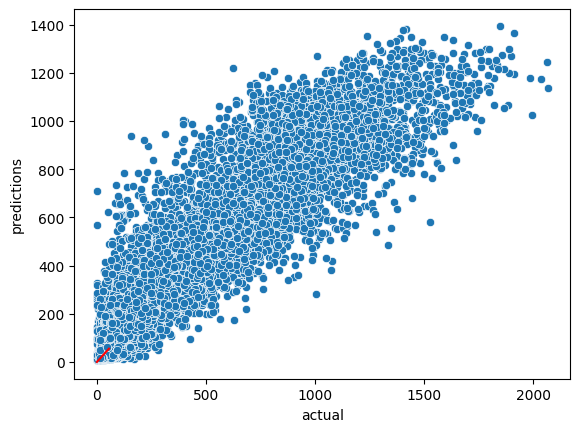

In [40]:
pred = pd.DataFrame(predictions,columns=['predictions'])
pred
pred['actual'] = y_test.tolist()
pred

pred['difference'] = pred['actual'] - pred['predictions']
pred

import seaborn as sns
import matplotlib.pyplot as plt

xlims =(0,55)
ax = sns.scatterplot(data=pred,x='actual',y='predictions')
ax.plot(xlims,xlims, color='r')
plt.show()